In [8]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as stats
import json
from config import api_key
from pprint import pprint
import random

In [9]:
#Create url
url = "http://www.omdbapi.com/?t="

movie_key = "&apikey=" + api_key


In [10]:
# list acquired from: https://www.randomlists.com/random-movies
movie = pd.read_csv("Movies.csv", header=0, escapechar='\\')
movie.head()

,Spies in Disguise
0,Captain Marvel
1,Alien
2,Your Name.
3,Fantasy Island
4,Rambo: Last Blood


In [11]:
#Pull sample of movies

#Create lists

movie["title"] = ""
movie["awards"] = ""
movie["director"]= ""
movie["genre"] = ""
movie["year"] = ""
movie["imdbRating"] = ""
movie["ratings_rotten"] = ""
movie["rating_ metacritic"] = ""
movie["run_time"] = ""
movie["writer"] = ""


index=0
for index, row in movie.iterrows():

    
    try:
        query_url = (url + str(row[0]) + movie_key)
        
        response = requests.get(query_url).json()
  
    
 
    
   
        #print(f"Gettting data for {['result'][0]['Title']}.")
   
        movie.loc[index, 'title'] = response['Title']
        movie.loc[index, 'awards'] = response['Awards']
        movie.loc[index, 'director'] = response['Director']
        movie.loc[index, 'genre'] = response['Genre']
        movie.loc[index, 'year'] = response['Year']
        movie.loc[index, 'imdbRating'] = response['imdbRating']
        movie.loc[index, 'rating_ metacritic'] = response['Metascore']
        movie.loc[index, 'run_time'] = response['Runtime']
        movie.loc[index, 'writer'] = response['Writer']
         
    except :
        print("Not a movie... skipping.")

Not a movie... skipping.


In [12]:
response


{'Title': 'Gone Girl',
 'Year': '2014',
 'Rated': 'R',
 'Released': '03 Oct 2014',
 'Runtime': '149 min',
 'Genre': 'Drama, Mystery, Thriller',
 'Director': 'David Fincher',
 'Writer': 'Gillian Flynn (screenplay), Gillian Flynn (novel)',
 'Actors': 'Ben Affleck, Rosamund Pike, Neil Patrick Harris, Tyler Perry',
 'Plot': "With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent.",
 'Language': 'English',
 'Country': 'USA',
 'Awards': 'Nominated for 1 Oscar. Another 64 wins & 183 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTk0MDQ3MzAzOV5BMl5BanBnXkFtZTgwNzU1NzE3MjE@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.1/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '87%'},
  {'Source': 'Metacritic', 'Value': '79/100'}],
 'Metascore': '79',
 'imdbRating': '8.1',
 'imdbVotes': '823,738',
 'imdbID': 'tt2267998',
 'Type': 'movie',


In [13]:
movie.head()

,Spies in Disguise,title,awards,director,genre,year,imdbRating,ratings_rotten,rating_ metacritic,run_time,writer
0,Captain Marvel,Captain Marvel,7 wins & 46 nominations.,"Anna Boden, Ryan Fleck","Action, Adventure, Sci-Fi",2019,6.9,,64,123 min,"Anna Boden (screenplay by), Ryan Fleck (screen..."
1,Alien,Alien,Won 1 Oscar. Another 16 wins & 21 nominations.,Ridley Scott,"Horror, Sci-Fi",1979,8.4,,89,117 min,"Dan O'Bannon (screenplay by), Dan O'Bannon (st..."
2,Your Name.,Your Name.,15 wins & 25 nominations.,Makoto Shinkai,"Animation, Drama, Fantasy, Romance",2016,8.4,,79,106 min,"Makoto Shinkai (based on his novel), Makoto Sh..."
3,Fantasy Island,Fantasy Island,N/A,Jeff Wadlow,"Adventure, Fantasy, Horror, Mystery, Thriller",2020,4.8,,22,109 min,"Jillian Jacobs, Christopher Roach, Jeff Wadlow"
4,Rambo: Last Blood,Rambo: Last Blood,4 wins & 7 nominations.,Adrian Grunberg,"Action, Thriller",2019,6.2,,26,89 min,"Matthew Cirulnick (screenplay by), Sylvester S..."


In [14]:
movie_short = movie[["title", "genre", "director", "year", "imdbRating", "rating_ metacritic", "run_time"]]
movie_short_rename = movie_short.rename(columns={"title": "Movies",
                                                 "genre": "Genre",
                                                 "director": "Director",
                                                 "year": "Release_Year", 
                                                 "imdbRating": "IMDB Rating",
                                                 "rating_ metacritic": "Metacritic Rating",
                                                 "run_time": "Movie RunTime"})
movie_short_rename

,Movies,Genre,Director,Release_Year,IMDB Rating,Metacritic Rating,Movie RunTime
0,Captain Marvel,"Action, Adventure, Sci-Fi","Anna Boden, Ryan Fleck",2019,6.9,64,123 min
1,Alien,"Horror, Sci-Fi",Ridley Scott,1979,8.4,89,117 min
2,Your Name.,"Animation, Drama, Fantasy, Romance",Makoto Shinkai,2016,8.4,79,106 min
3,Fantasy Island,"Adventure, Fantasy, Horror, Mystery, Thriller",Jeff Wadlow,2020,4.8,22,109 min
4,Rambo: Last Blood,"Action, Thriller",Adrian Grunberg,2019,6.2,26,89 min
...,...,...,...,...,...,...,...
185,Underwater,"Action, Horror, Sci-Fi, Thriller",William Eubank,2020,5.8,48,95 min
186,Bad Boys for Life,"Action, Comedy, Crime, Thriller","Adil El Arbi, Bilall Fallah",2020,6.7,59,124 min
187,Avatar,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,2009,7.8,83,162 min
188,Alien: Covenant,"Horror, Sci-Fi, Thriller",Ridley Scott,2017,6.4,65,122 min


In [15]:
movie_split_genre = movie_short_rename["Genre"].str.split(",", n=4, expand=True)
movie_split_director = movie_short_rename["Director"].str.split(",", n=1, expand=True)
movie_split_genre = movie_split_genre.rename(columns={0: "Genre 1",
                                                     1: "Genre 2",
                                                     2: "Genre 3",
                                                     3: "Genre 4",
                                                     4: "Genre 5"})
movie_split_director = movie_split_director.rename(columns={0: "Director 1",
                                                     1: "Director 2"})
                                                     
movie_split_genre

#movie_genre = movie_split_genre.groupby(["Genre 1"]).count()
movie_short_rename["Genre"] = movie_split_genre["Genre 1"]
movie_short_rename["Director"] = movie_split_director["Director 1"]

movie_short_rename

,Movies,Genre,Director,Release_Year,IMDB Rating,Metacritic Rating,Movie RunTime
0,Captain Marvel,Action,Anna Boden,2019,6.9,64,123 min
1,Alien,Horror,Ridley Scott,1979,8.4,89,117 min
2,Your Name.,Animation,Makoto Shinkai,2016,8.4,79,106 min
3,Fantasy Island,Adventure,Jeff Wadlow,2020,4.8,22,109 min
4,Rambo: Last Blood,Action,Adrian Grunberg,2019,6.2,26,89 min
...,...,...,...,...,...,...,...
185,Underwater,Action,William Eubank,2020,5.8,48,95 min
186,Bad Boys for Life,Action,Adil El Arbi,2020,6.7,59,124 min
187,Avatar,Action,James Cameron,2009,7.8,83,162 min
188,Alien: Covenant,Horror,Ridley Scott,2017,6.4,65,122 min


In [16]:
#Create a df containing the number of genres
movie_genre_group = movie_short_rename.groupby(["Genre"]).count()
movie_genre_group.reset_index(level=0, inplace=True)
movie_genre_group

,Genre,Movies,Director,Release_Year,IMDB Rating,Metacritic Rating,Movie RunTime
0,,1,1,1,1,1,1
1,Action,81,81,81,81,81,81
2,Adventure,21,21,21,21,21,21
3,Animation,24,24,24,24,24,24
4,Biography,8,8,8,8,8,8
5,Comedy,15,15,15,15,15,15
6,Crime,7,7,7,7,7,7
7,Documentary,2,2,2,2,2,2
8,Drama,20,20,20,20,20,20
9,Horror,6,6,6,6,6,6


In [17]:
#Cut off genre types with only 1 in the category
movie_genre_group_clean = movie_genre_group[movie_genre_group.Movies > 1]
movie_genre_group_clean

,Genre,Movies,Director,Release_Year,IMDB Rating,Metacritic Rating,Movie RunTime
1,Action,81,81,81,81,81,81
2,Adventure,21,21,21,21,21,21
3,Animation,24,24,24,24,24,24
4,Biography,8,8,8,8,8,8
5,Comedy,15,15,15,15,15,15
6,Crime,7,7,7,7,7,7
7,Documentary,2,2,2,2,2,2
8,Drama,20,20,20,20,20,20
9,Horror,6,6,6,6,6,6


In [18]:
#Get a count of movies by each director
movie_director = movie_short_rename.groupby(["Director"]).count()
#place an index value so the results can be graphed
movie_director.reset_index(level=0, inplace=True)
#Drop row w/o director name
movie_director_clean = movie_director[movie_director.Director != ""]
movie_director_clean

,Director,Movies,Genre,Release_Year,IMDB Rating,Metacritic Rating,Movie RunTime
1,Adam Robitel,1,1,1,1,1,1
2,Adil El Arbi,1,1,1,1,1,1
3,Adrian Grunberg,1,1,1,1,1,1
4,Alan Taylor,1,1,1,1,1,1
5,Alejandro G. Iñárritu,1,1,1,1,1,1
...,...,...,...,...,...,...,...
141,Tuva Novotny,1,1,1,1,1,1
142,Vince Gilligan,1,1,1,1,1,1
143,Wes Ball,1,1,1,1,1,1
144,William Eubank,1,1,1,1,1,1


In [19]:
#Remove any directors with 2 or less movies
movie_director_cleaner = movie_director_clean[movie_director.Movies > 2]
movie_director_cleaner

C:\Users\tomse\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Director,Movies,Genre,Release_Year,IMDB Rating,Metacritic Rating,Movie RunTime
12,Anthony Russo,3,3,3,3,3,3
30,Christopher Nolan,4,4,4,4,4,4
38,David Fincher,3,3,3,3,3,3
42,David Yates,4,4,4,4,4,4
60,Hayao Miyazaki,3,3,3,3,3,3
62,James Cameron,4,4,4,4,4,4
102,Peter Jackson,5,5,5,5,5,5
106,Quentin Tarantino,3,3,3,3,3,3
109,Ridley Scott,5,5,5,5,5,5
129,Steven Spielberg,3,3,3,3,3,3


In [20]:
#Group movies by release year
movie_year = movie_short_rename.groupby(["Release_Year"]).count()
#Add index so data can be graphed
movie_year.reset_index(level=0, inplace=True)
#Remove column with no year listed
movie_year_clean = movie_year[movie_year.Release_Year != 0]
movie_year_clean

,Release_Year,Movies,Genre,Director,IMDB Rating,Metacritic Rating,Movie RunTime
0,,1,1,1,1,1,1
1,1954,1,1,1,1,1,1
2,1972,1,1,1,1,1,1
3,1975,1,1,1,1,1,1
4,1977,2,2,2,2,2,2
5,1979,2,2,2,2,2,2
6,1982,1,1,1,1,1,1
7,1984,1,1,1,1,1,1
8,1985,1,1,1,1,1,1
9,1988,2,2,2,2,2,2


In [21]:
#Select only years that have more than 4 movies
movie_year_cleaner = movie_year_clean[movie_year.Movies >= 4]
movie_year_cleaner

,Release_Year,Movies,Genre,Director,IMDB Rating,Metacritic Rating,Movie RunTime
21,2003,6,6,6,6,6,6
26,2008,4,4,4,4,4,4
30,2012,9,9,9,9,9,9
31,2013,5,5,5,5,5,5
32,2014,15,15,15,15,15,15
33,2015,14,14,14,14,14,14
34,2016,8,8,8,8,8,8
35,2017,8,8,8,8,8,8
36,2018,9,9,9,9,9,9
37,2019,39,39,39,39,39,39


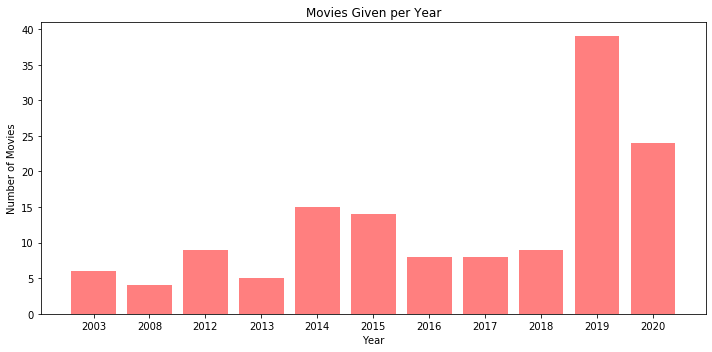

In [24]:
#Bar graph show the variety of movies by year made
x_axis = np.arange(len(movie_year_cleaner))
tick_locations = [value+0.4 for value in x_axis]
                  
plt.figure(figsize=(10,5))
plt.bar(x_axis, movie_year_cleaner["Movies"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, movie_year_cleaner["Release_Year"], rotation="horizontal")

plt.title("Movies Given per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


In [30]:
#Get movie counts for each IMDB score
movie_imdb_score = movie_short_rename.groupby(["IMDB Rating"]).count()
#Drop N/A and spaces from IMDB Rating
movie_imdb_nona = movie_imdb_score.drop(['N/A',''], axis=0)
#Put index on df so it can be graphed
movie_imdb_nona.reset_index(level=0, inplace=True)
movie_imdb_nona

,IMDB Rating,Movies,Genre,Director,Release_Year,Metacritic Rating,Movie RunTime
0,3.7,1,1,1,1,1,1
1,4.1,1,1,1,1,1,1
2,4.5,1,1,1,1,1,1
3,4.8,1,1,1,1,1,1
4,5.1,1,1,1,1,1,1
5,5.2,1,1,1,1,1,1
6,5.3,2,2,2,2,2,2
7,5.5,2,2,2,2,2,2
8,5.6,1,1,1,1,1,1
9,5.7,5,5,5,5,5,5


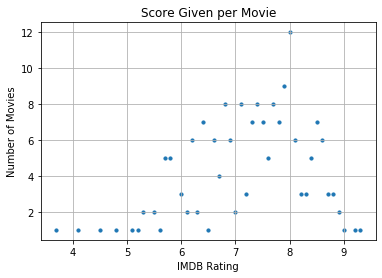

In [26]:
#Convert data to numbers
movie_imdb_nona = movie_imdb_nona.apply(pd.to_numeric) 

#Convert to scatter plot
#IMDB range is 1 to 10
#Where do the majority of movies fall >= or <5?(MOst are above 5 so they are "good" movies)
plt.scatter(movie_imdb_nona["IMDB Rating"], movie_imdb_nona["Movies"], marker="o", s=10)

plt.title("Score Given per Movie")
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [27]:
#Number of movies per metacritic score
movie_metacritic_score = movie_short_rename.groupby(["Metacritic Rating"]).count()
movie_metacritic_score

,Movies,Genre,Director,Release_Year,IMDB Rating,Movie RunTime
Metacritic Rating,,,,,,
,1,1,1,1,1,1
100,1,1,1,1,1,1
22,1,1,1,1,1,1
26,3,3,3,3,3,3
27,1,1,1,1,1,1
...,...,...,...,...,...,...
92,1,1,1,1,1,1
93,1,1,1,1,1,1
94,4,4,4,4,4,4


In [31]:
#Drop N/A and spaces from Metacritic Rating column
movie_metacritic_nona = movie_metacritic_score_sort.drop(['N/A',''], axis=0)
#Put index on df so it can be graphed
movie_metacritic_nona.reset_index(level=0, inplace=True)
movie_metacritic_nona

,Metacritic Rating,Movies,Genre,Director,Release_Year,IMDB Rating,Movie RunTime
0,96,2,2,2,2,2,2
1,94,4,4,4,4,4,4
2,93,1,1,1,1,1,1
3,92,1,1,1,1,1,1
4,91,1,1,1,1,1,1
...,...,...,...,...,...,...,...
58,30,1,1,1,1,1,1
59,27,1,1,1,1,1,1
60,26,3,3,3,3,3,3
61,22,1,1,1,1,1,1


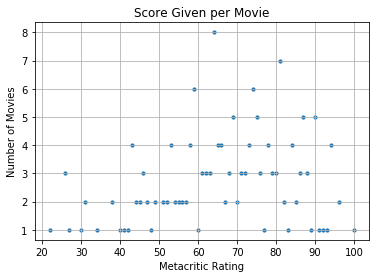

In [29]:
#Convert column values to numbers
movie_metacritic_nona = movie_metacritic_nona.apply(pd.to_numeric)

#Create scatter plot
#IMDB range is 1 to 100
# Where do the majority of movies fall >= or <60?
#Since the scoresare between 20 and 100, 60 is the midpoint


plt.scatter(movie_metacritic_nona["Metacritic Rating"], movie_metacritic_nona["Movies"], marker="o", s=10)

plt.title("Score Given per Movie")
plt.xlabel("Metacritic Rating")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [ ]:
movie_metacritic_nona_count = movie_metacritic_nona[movie_metacritic_nona.]